<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/12%EC%9B%94_1%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

보팅_앙상블_손글씨 분류

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
np.random.seed(5)

In [3]:
#손글씨 데이터 로드
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [4]:
X_train.shape

(1437, 64)

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

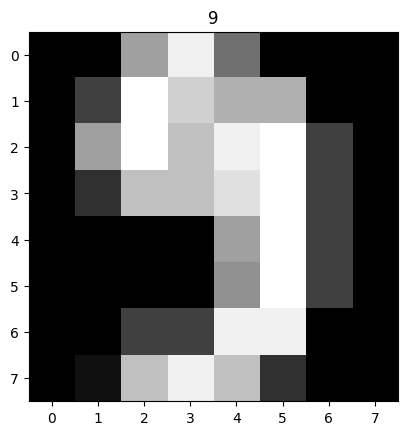

In [6]:
plt.imshow(X_train[0].reshape(8,8),cmap='gray')
plt.title(y_train[0])

In [7]:
X_test.shape

(360, 64)

단일 모델 정확도 측정  
의사결정트리, knn, svm 모델의 정확도를 측정

In [8]:
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32,random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True,random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [9]:
dtree_predicted.shape   #test가 360이기 때문에 predict도 360개이다.

(360,)

In [10]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.8277777777777777
knn   :  0.8944444444444445
svm   :  0.8916666666666667


In [11]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.00129293 0.00434548 0.00446459 0.00248053 0.00336731 0.93848315
  0.00127073 0.00448341 0.02477231 0.01503956]
 [0.00189233 0.00631647 0.92958418 0.00345522 0.0030971  0.00828454
  0.00186869 0.0048112  0.03092707 0.0097632 ]]


하드 보팅:
하드 보팅은 일반적인 투표와 같이, 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식



In [12]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,2,3], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.925

소프트 보팅:
소프트 보팅은 각각의 분류모델의 predict_proba을 활용하여, 모든 분류값들의 확률들을 더해서,
가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

In [13]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,3,2], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9388888888888889